In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

In [5]:
#loading data
dataX = np.genfromtxt('/Users/anamikaseth/Desktop/Academics/Sem2301/COL774/Assignments/Ass1/data/q4/q4x.dat', delimiter = '  ')
print(dataX.shape)
dataX = (dataX - np.mean(dataX,axis = 0))/np.std(dataX,axis = 0)
with open('/Users/anamikaseth/Desktop/Academics/Sem2301/COL774/Assignments/Ass1/data/q4/q4y.dat','r') as f:
    dataTemp = f.read().split()
dataY = np.zeros(len(dataTemp))
for i in range(len(dataTemp)):
    if dataTemp[i] == 'Alaska':
        dataY[i] = 1
    else:
        dataY[i] =0
dataY = dataY.reshape(dataY.shape[0],1)
dataComb = np.concatenate([dataY,dataX],axis = 1)


(100, 2)


In [6]:
#estimation of parameters
def getPhi(Y: np.ndarray):
    return np.sum(Y[Y==1])/Y.shape[0]

def getMu(X: np.ndarray ,Y: np.ndarray ,k = 0):
    return np.sum(X[np.where(Y==k)[0]],axis = 0)/X[np.where(Y==k)[0]].shape[0]

def covMatrixCommon(X: np.ndarray,Y: np.ndarray, k = 2):
    # k = 2 for common matrix

    mu0 = getMu(X,Y,0) ; mu1 = getMu(X,Y,1)
    if k == 0 :
        temp = X[Y.reshape(Y.shape[0]) == 0] - mu0
        return np.matmul(temp.T,temp)/temp.shape[0]
    
    if k == 1 :
        temp = X[Y.reshape(Y.shape[0]) == 1] - mu1
        return np.matmul(temp.T,temp)/temp.shape[0]

    else :
        temp = X-np.where(Y==0,mu0.T,mu1.T)
        return np.matmul(temp.T,temp)/Y.shape[0]

1.3322676295501878e-15


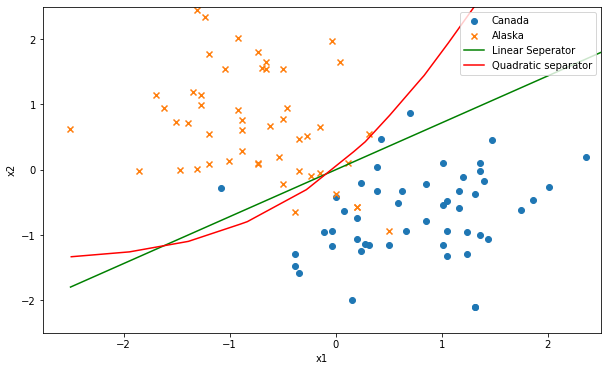

In [19]:
#Linear seperator plot
mu0 = getMu(dataX,dataY,0)
mu1 = getMu(dataX,dataY,1)
mu0 = mu0.reshape(mu0.shape[0],1)
mu1 = mu1.reshape(mu1.shape[0],1)
cov_inv = np.linalg.inv(covMatrixCommon(dataX,dataY))
phi = getPhi(dataY)

#getting eq of line
b = (np.log((1-phi)/phi) + (np.matmul(mu1.T,np.matmul(cov_inv,mu1)) - np.matmul(mu0.T,np.matmul(cov_inv,mu0)))/2)[0][0]
print(b)
theta = np.matmul((mu1-mu0).T,cov_inv)
theta1 = theta[0][0]; theta2 = theta[0][1]
x1 = np.linspace(-2.5,2.5,100)
f = lambda x : (-b/theta1) - (theta2/theta1)*x
y1 = f(x1)
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(xlabel = 'x1', ylabel = 'x2')
axes.scatter(dataComb[dataComb[:,0]==0][:,1],dataComb[dataComb[:,0]==0][:,2],label = "Canada")
axes.scatter(dataComb[dataComb[:,0]==1][:,1],dataComb[dataComb[:,0]==1][:,2],marker=  'x',label = "Alaska")
axes.plot(x1,y1,color = 'green', label = "Linear Seperator")


#Quadratic seperator plot
# will plot the contours and pick out line with value = 0
def diffLog(x: np.ndarray,mu0,mu1,cov0,cov1,phi):
    x = x.reshape(x.shape[0],1)
    # input x as a vector
    cov0inv = np.linalg.inv(cov0)
    cov1inv = np.linalg.inv(cov1)   
    return (np.log(((1-phi)/phi)*np.sqrt((np.linalg.det(cov1)/np.linalg.det(cov0)))) + \
           1/2*(np.matmul(x.T,np.matmul(cov1inv-cov0inv,x))) - \
            np.matmul((np.matmul(mu1.T,cov1inv) - np.matmul(mu0.T,cov0inv)),x) + \
           (1/2)*(np.matmul(mu1.T,np.matmul(cov_inv,mu1)) - np.matmul(mu0.T,np.matmul(cov_inv,mu0))))[0][0]

cov0 = covMatrixCommon(dataX,dataY,0)
cov1 = covMatrixCommon(dataX,dataY,1)

x1, x2 = np.meshgrid(*np.linspace([-2.5, -2.5], [2.5, 2.5], 10).T)
z = np.apply_along_axis(lambda x: diffLog(x, mu0, mu1,cov0,cov1,phi), 2, np.stack([x1, x2], axis=-1))
axes.contour(x1, x2, z, [0], colors='red')
axes.plot([], [], color='red', label='Quadratic separator')
axes.legend(loc = 'upper right')
plt.show()
fig.savefig('Q4.png')

In [159]:
print(phi)
print(covMatrixCommon(dataX,dataY))
print(cov0)
print(cov1)
print(mu0)
print(mu1)

0.5
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
[[ 0.75529433]
 [-0.68509431]]
[[-0.75529433]
 [ 0.68509431]]


1.3322676295501878e-15


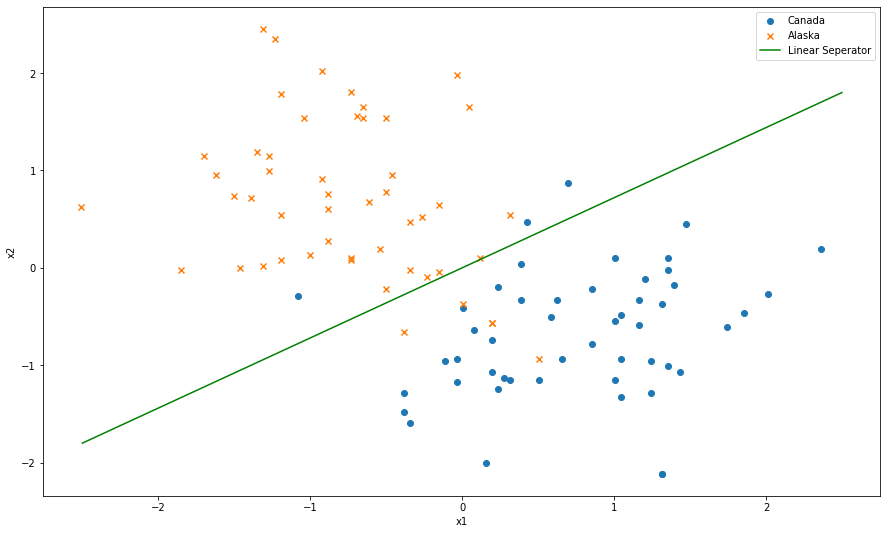

In [166]:
mu0 = getMu(dataX,dataY,0)
mu1 = getMu(dataX,dataY,1)
mu0 = mu0.reshape(mu0.shape[0],1)
mu1 = mu1.reshape(mu1.shape[0],1)
cov_inv = np.linalg.inv(covMatrixCommon(dataX,dataY))
phi = getPhi(dataY)

#getting eq of line
b = (np.log((1-phi)/phi) + (np.matmul(mu1.T,np.matmul(cov_inv,mu1)) - np.matmul(mu0.T,np.matmul(cov_inv,mu0)))/2)[0][0]
print(b)
theta = np.matmul((mu1-mu0).T,cov_inv)
theta1 = theta[0][0]; theta2 = theta[0][1]
x1 = np.linspace(-2.5,2.5,100)
f = lambda x : (-b/theta1) - (theta2/theta1)*x
y1 = f(x1)
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(xlabel = 'x1', ylabel = 'x2')
axes.scatter(dataComb[dataComb[:,0]==0][:,1],dataComb[dataComb[:,0]==0][:,2],label = "Canada")
axes.scatter(dataComb[dataComb[:,0]==1][:,1],dataComb[dataComb[:,0]==1][:,2],marker=  'x',label = "Alaska")
axes.plot(x1,y1,color = 'green', label = "Linear Seperator")
axes.legend()
plt.show()
fig.savefig('images/Q4sep.png')
